# Gatos vs. Perros

En este problema hay solo dos clases: gatos y perros. El ejemplo presenta dos bases de datos y es necesario escoger uno de ellos:.


* Reduced dataset: con algunas imágenes de gatos y perros para realizar un entrenamiento más rápido (pero menos efectivo). Para este conjunto se recomienda una CNN simple (de pocas capas, ver modelo para "reduced dataset").

* Full dataset: con un conjunto mayor de imágenes de gatos y perros que se usa para entrenar un modelo más efectivo (con mejor accuracy) pero con un entrenamiento más lento. Para este conjunto se recomienda una CNN compleja (de más capas, ver modelo para "large dataset").

Interesante en este ejemplo es que los conjuntos de datos de training y testing están pre-definidos y no se escogen de manera aleatoria. Sin embargo, el conjunto de validación es escogido aleatoriamente del conjunto de training. Esta información es definida con la función `ImageLoader`.

Referencia: [CNN Model With PyTorch For Image Classification](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48), by Pranjal Soni (Medium)

In [1]:
import torch
import torchvision

from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Reduced dataset
!unzip -qq catdog_reduced.zip

In [5]:
# Full dataset
!unzip -qq training_set.zip
!unzip -qq test_set.zip

replace training_set/dogs/dog.1753.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/training_set/dogs/._dog.1753.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace training_set/dogs/dog.3144.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/training_set/dogs/._dog.3144.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace training_set/dogs/dog.775.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/training_set/dogs/._dog.775.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace __MACOSX/training_set/dogs/._dog.775.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [6]:
train_dir = "catdog/train/"
test_dir  = "catdog/test/"

In [7]:
#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['cats', 'dogs']


In [9]:
from cnn_utils import *
print('cnn_utils module has been loaded')

cnn_utils module has been loaded


Image: 2012, Label : dogs


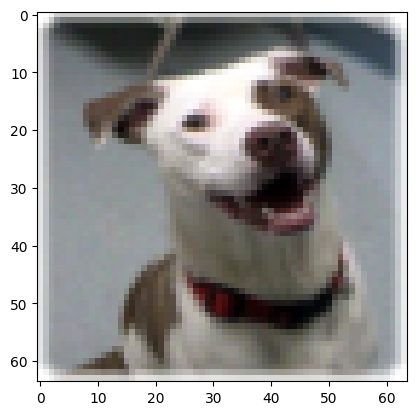

In [10]:
#display an image in the training dataset
display_img(train_set,2012)

In [11]:
#load the train and validation into batches.

batch_size = 100
val_size   = 800
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 2, pin_memory = True)


Length of Train Data : 3200
Length of Validation Data : 800


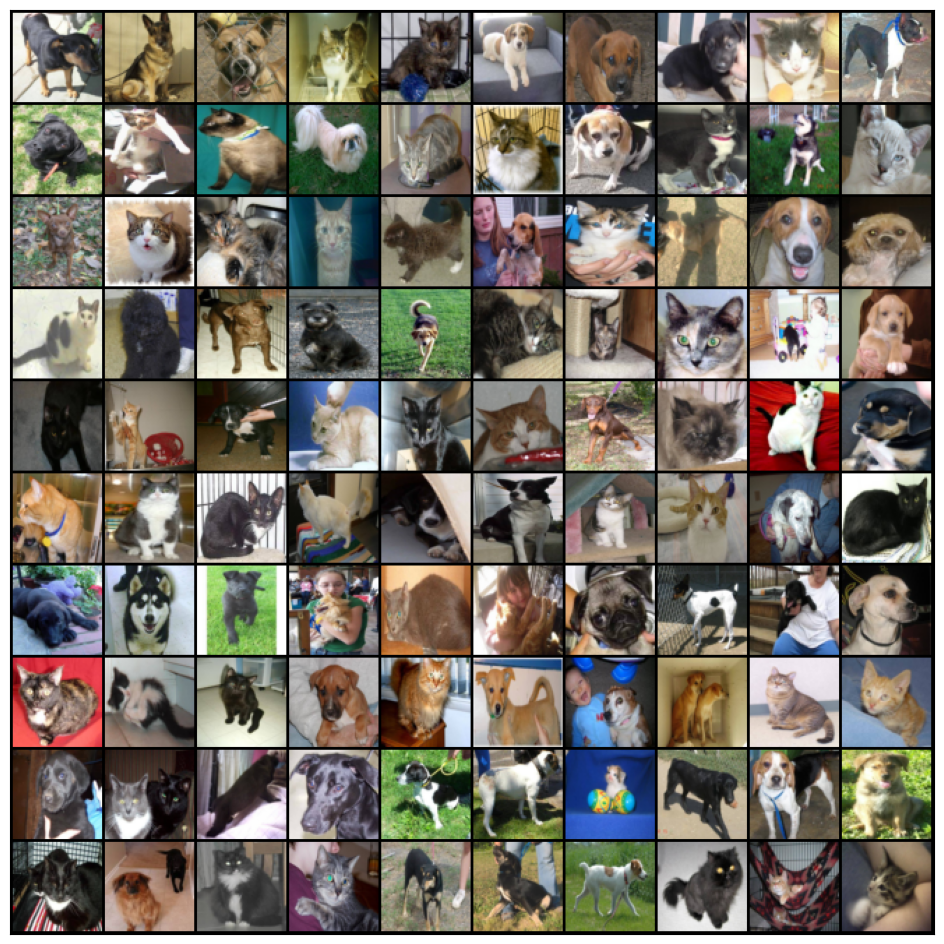

In [12]:
show_batch(train_dl,nrow=10)

In [13]:
# for reduced dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(4,8, kernel_size = 5, stride = 4, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(392,32),
            nn.Linear(32,2)
        )

    def forward(self, xb):
        return self.network(xb)


In [14]:
# for full dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [15]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2048, out_features=1024, bias=True)
    (12): Linear(in_features=1024, out_features=128, bias=True)
    (13): Linear(in_features=128, out_features=2, bias=True)
    (14): Dropout(p=0.25, inplace=False)
  )
)


In [16]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6934      0.6859      0.5887    ***      11.9 
    1      0.6805      0.6722      0.5550             11.6 
    2      0.6533      0.6327      0.6262    ***      14.1 
    3      0.6361      0.6423      0.6237             12.5 
    4      0.6202      0.6297      0.6287    ***      10.9 
    5      0.6145      0.6214      0.6463    ***      11.9 
    6      0.5910      0.5973      0.6712    ***      11.8 
    7      0.5746      0.5833      0.6887    ***      12.2 
    8      0.5730      0.5884      0.6838             11.9 
    9      0.5676      0.5710      0.7025    ***      11.9 
   10      0.5613      0.5940      0.6825             12.2 
   11      0.5295      0.5714      0.6975             12.1 
   12      0.5182      0.5580      0.7138    ***      12.2 
   13      0.5341      0.5451      0.7263    ***      11.8 
   14      0.5207      0.5600 

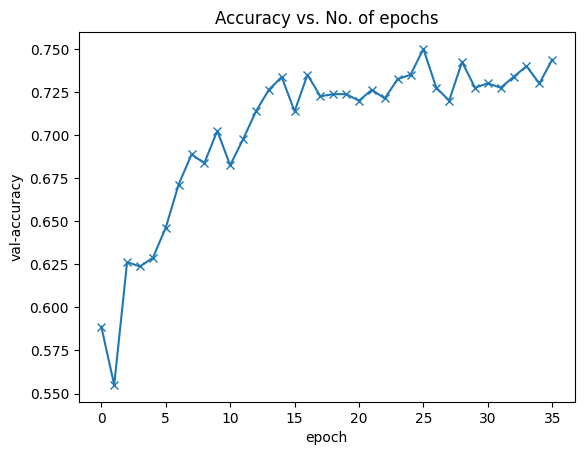

In [17]:
plot_accuracies(history)

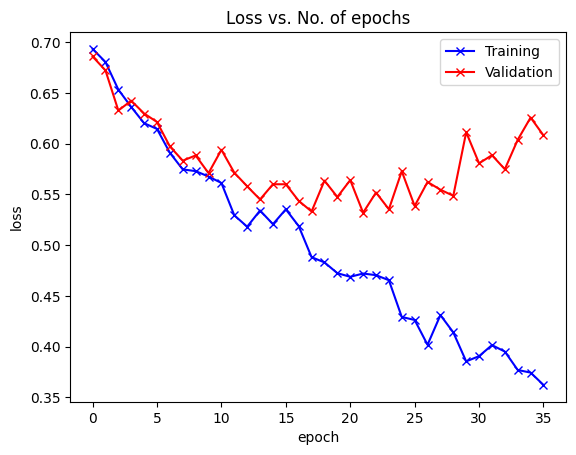

In [18]:
plot_losses(history)

In [19]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [20]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.7682317682317682
 
Confusion Matrix = 
[[402  99]
 [133 367]]


In [21]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[1402  199]
 [ 296 1303]]
 
Training Accuracy = 0.8453
 
Validation Confusion Matrix = 
[[306  93]
 [107 294]]
 
Validation Accuracy = 0.7500
 
Testing Confusion Matrix = 
[[402  99]
 [133 367]]
 
Testing Accuracy = 0.7682
 
